<a href="https://colab.research.google.com/github/zhoukiller/Andrew-Ng-Deep-Learning-notes/blob/master/Downloading_Kaggle_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"blackhorseman","key":"218f85680a49e804a2c0aa29ecb38c86"}'}

In [2]:
!ls -al

total 20
drwxr-xr-x 1 root root 4096 Feb 24 15:57 .
drwxr-xr-x 1 root root 4096 Feb 24 15:55 ..
drwxr-xr-x 4 root root 4096 Feb 15 17:21 .config
-rw-r--r-- 1 root root   69 Feb 24 15:57 kaggle.json
drwxr-xr-x 1 root root 4096 Feb 15 17:21 sample_data


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
!ls -l ~/.kaggle
!cat ~/.kaggle/kaggle.json

total 4
-rw------- 1 root root 69 Feb 24 15:58 kaggle.json
{"username":"blackhorseman","key":"218f85680a49e804a2c0aa29ecb38c86"}

In [5]:
!pip install -q kaggle
!pip install -q kaggle-cli

    100% |████████████████████████████████| 81kB 6.8MB/s 
    100% |████████████████████████████████| 5.3MB 6.5MB/s 
    100% |████████████████████████████████| 92kB 25.5MB/s 
    100% |████████████████████████████████| 51kB 20.5MB/s 


In [0]:
!kaggle datasets list

In [0]:
!kaggle competitions list

In [6]:
!kaggle competitions download -c dogs-vs-cats

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 32.5MB/s]
 96% 261M/271M [00:02<00:00, 130MB/s]
100% 271M/271M [00:02<00:00, 115MB/s]
 98% 534M/543M [00:03<00:00, 200MB/s]
100% 543M/543M [00:03<00:00, 159MB/s]


In [0]:
!zipinfo -l test1.zip

In [0]:
!mkdir tmp

In [0]:
!unzip -n train.zip -d tmp/

In [0]:
!mkdir datasets

In [0]:
!mkdir datasets/cats_and_dogs_small

# Cats and dogs

## specify dirs of images

In [0]:
train_origin = "tmp/train"

In [0]:
base_dir = "datasets/cats_and_dogs_small"

In [0]:
import os,shutil

In [0]:
train_dir = os.path.join(base_dir,"train")
os.mkdir(train_dir)

test_dir = os.path.join(base_dir,"test")
os.mkdir(test_dir)

validation_dir = os.path.join(base_dir,"validation")
os.mkdir(validation_dir)

In [0]:
train_dog_dir = os.path.join(train_dir,"dogs")
train_cat_dir = os.path.join(train_dir,"cats")
os.mkdir(train_dog_dir)
os.mkdir(train_cat_dir)

test_dog_dir = os.path.join(test_dir,"dogs")
test_cat_dir = os.path.join(test_dir,"cats")
os.mkdir(test_dog_dir)
os.mkdir(test_cat_dir)

validation_dog_dir = os.path.join(validation_dir,"dogs")
validation_cat_dir = os.path.join(validation_dir,"cats")
os.mkdir(validation_dog_dir)
os.mkdir(validation_cat_dir)

## copy files to corresponding dir

In [0]:
def copy_files(src_dir,dest_dir,category,ranges):
  start,end = ranges
  print(start,end)
  frames = [category + ".{}.jpg".format(i) for i in range(start,end)]
  for frame in frames:
    src = os.path.join(src_dir,frame)
    dst = os.path.join(dest_dir,frame)
    shutil.copyfile(src,dst)
#       print(os.path.join(src_dir,frame))
#       print(os.path.join(dest_dir,frame))

In [0]:
!ls -l datasets/cats_and_dogs_small/train/dogs

In [20]:
copy_files(train_origin,train_cat_dir,"cat",(0,1000))

0 1000


In [21]:
copy_files(train_origin,validation_cat_dir,"cat",(1000,1500))

1000 1500


In [22]:
copy_files(train_origin,test_cat_dir,"cat",(1500,2000))

1500 2000


In [23]:
copy_files(train_origin,train_dog_dir,"dog",(0,1000))

0 1000


In [24]:
copy_files(train_origin,validation_dog_dir,"dog",(1000,1500))

1000 1500


In [25]:
copy_files(train_origin,test_dog_dir,"dog",(1500,2000))

1500 2000


## check copy

In [32]:
print("total training cat images:",len(os.listdir(train_cat_dir)))

total training cat images: 1000


In [33]:
print("total training dog images:",len(os.listdir(train_dog_dir)))

total training dog images: 1000


In [34]:
print("total validation cat images:",len(os.listdir(validation_cat_dir)))

total validation cat images: 500


In [35]:
print("total validation dog images:",len(os.listdir(validation_dog_dir)))

total validation dog images: 500


In [36]:
print("total test cat images:",len(os.listdir(test_cat_dir)))

total test cat images: 500


In [37]:
print("total test dog images:",len(os.listdir(test_dog_dir)))

total test dog images: 500


## build the model

In [0]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models

In [0]:
Conv2D = layers.Conv2D
MaxPooling2D = layers.MaxPooling2D
Flatten = layers.Flatten
Dense = layers.Dense

In [40]:
model = models.Sequential()
model.add(Conv2D(32,(3,3),activation="relu",input_shape = (150,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

Instructions for updating:
Colocations handled automatically by placer.


In [41]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [0]:
from tensorflow.keras import optimizers

In [0]:
model.compile(loss="binary_crossentropy",
             optimizer = optimizers.RMSprop(lr=1e-4),
             metrics = ["accuracy"])

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [46]:
train_generator = train_datagen.flow_from_directory(
          train_dir,
          target_size=(150,150),
          batch_size=20,
          class_mode="binary")

Found 2000 images belonging to 2 classes.


In [47]:
validation_generator = train_datagen.flow_from_directory(
          validation_dir,
          target_size=(150,150),
          batch_size=20,
          class_mode="binary")

Found 1000 images belonging to 2 classes.


In [48]:
for data_batch, labels_batch in train_generator:
    print("data batch shape:",data_batch.shape)
    print("labels batch shape:",labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [49]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch=100,
            epochs=30,
            validation_data=validation_generator,
            validation_steps=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 15s 153ms/step - loss: 0.6921 - acc: 0.5145 - val_loss: 0.6767 - val_acc: 0.5400
Epoch 2/30
100/100 [==============================] - 12s 119ms/step - loss: 0.6695 - acc: 0.6080 - val_loss: 0.6411 - val_acc: 0.6570
Epoch 3/30
100/100 [==============================] - 12s 119ms/step - loss: 0.6238 - acc: 0.6520 - val_loss: 0.6230 - val_acc: 0.6530
Epoch 4/30
100/100 [==============================] - 12s 120ms/step - loss: 0.5819 - acc: 0.6995 - val_loss: 0.5868 - val_acc: 0.6900
Epoch 5/30
100/100 [==============================] - 12s 121ms/step - loss: 0.5357 - acc: 0.7265 - val_loss: 0.6513 - val_acc: 0.6660
Epoch 6/30
100/100 [==============================] - 12s 120ms/step - loss: 0.5226 - acc: 0.7295 - val_loss: 0.5607 - val_acc: 0.7000
Epoch 7/30
100/100 [==============================] - 12s 120ms/step - loss: 0.4792 - acc: 0.7685 - val_loss: 0.5609 - val_acc: 0.7080
Epoch 8

In [0]:
model.save("cats_and_dogs_small_1.h5")

## ploting the result

In [0]:
import matplotlib.pyplot as plt

In [0]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1,len(acc) + 1)

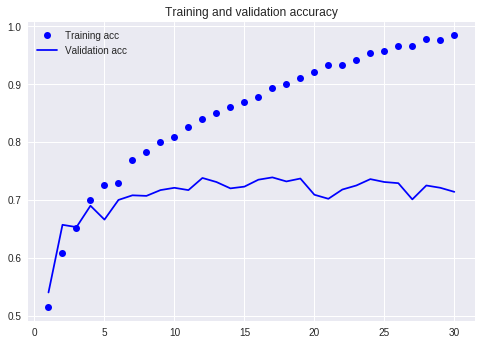

In [56]:
plt.plot(epochs,acc,"bo",label="Training acc")
plt.plot(epochs,val_acc,"b",label="Validation acc")
plt.title("Training and validation accuracy")
plt.legend()

In [57]:
plt.figure()

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

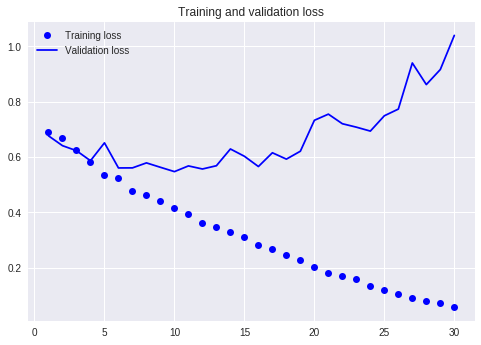

In [58]:
plt.plot(epochs,loss,"bo",label="Training loss")
plt.plot(epochs,val_loss,"b",label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [59]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


##  Transferring files between Google Colab and Google Drive

In [65]:
!git clone https://gist.github.com/dc7e60aa487430ea704a8cb3f2c5d6a6.git /tmp/colab_util_repo
!mv /tmp/colab_util_repo/colab_util.py colab_util.py 
!rm -r /tmp/colab_util_repo

Cloning into '/tmp/colab_util_repo'...
remote: Enumerating objects: 40, done.
remote: Total 40 (delta 0), reused 0 (delta 0), pack-reused 40
Unpacking objects: 100% (40/40), done.


In [67]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 131352 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.1-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=ht

In [69]:
!pip install -U -q PyDrive

    100% |████████████████████████████████| 993kB 20.7MB/s 


In [0]:
from colab_util import *
drive_handler = GoogleDriveHandler()

In [71]:

test_folder_id = drive_handler.create_folder('test_folder')
test_folder_id

'1svt-fpufFuEQhtYs_LbKYRo_1SgLsAXI'

In [73]:
drive_handler.upload("cats_and_dogs_small_1.h5", parent_path='test_folder')
drive_handler.list_folder('1svt-fpufFuEQhtYs_LbKYRo_1SgLsAXI', max_depth=1)

[{'id': '1TVpgrHMeUmGJpy1w6DsjcXxDeLr3ZIFv',
  'link': 'https://drive.google.com/file/d/1TVpgrHMeUmGJpy1w6DsjcXxDeLr3ZIFv/view?usp=drivesdk',
  'mimeType': 'application/octet-stream',
  'title': 'cats_and_dogs_small_1.h5'}]